# Cuaderno 2: Árboles generadores de peso mínimo

$\newcommand{\R}{\mathbb{R}}$
Dos algoritmos conocidos para el cálculo de árboles generadores de peso mínimo son el *algoritmo de Kruskal* y el *algoritmo de Prim*.
 
## Algoritmo de Kruskal:

Consideremos el grafo no dirigido $G=(V, E)$, con costos sobre las aristas $c \in \R^{E}$, dado por medio de las siguientes listas:

In [1]:
V = list(range(1, 7))
E = [(1,2), (1,3), (2,3), (2,4), (3,4), (1, 4), (5,6), (3,5), (4,6)]
# costos sobre las aristas
c = [-5, 4, 3, -7, 5, 1, 0, 2, 5]

print('V= {}'.format(V))
print('E= {}'.format(E))
print('c= {}'.format(c))


V= [1, 2, 3, 4, 5, 6]
E= [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (1, 4), (5, 6), (3, 5), (4, 6)]
c= [-5, 4, 3, -7, 5, 1, 0, 2, 5]


En primer lugar, creamos diccionarios con las aristas incidentes a cada nodo, y con los costos de las aristas:

In [2]:
# crear diccionarios de aristas incidentes
incidentes = {i : [(k,j) for (k,j) in E if k==i or j==i] for i in V}

# crear diccionario con costos de aristas
cc = {E[i] : c[i] for i in range(len(E))}

print('incidentes= {}'.format(incidentes))
print('cc= {}'.format(cc))
print(cc[1,3])

incidentes= {1: [(1, 2), (1, 3), (1, 4)], 2: [(1, 2), (2, 3), (2, 4)], 3: [(1, 3), (2, 3), (3, 4), (3, 5)], 4: [(2, 4), (3, 4), (1, 4), (4, 6)], 5: [(5, 6), (3, 5)], 6: [(5, 6), (4, 6)]}
cc= {(1, 2): -5, (1, 3): 4, (2, 3): 3, (2, 4): -7, (3, 4): 5, (1, 4): 1, (5, 6): 0, (3, 5): 2, (4, 6): 5}
4


El algoritmo de Kruskal requiere como primer paso ordenar las aristas de acuerdo a sus costos. Para ello, puede llamarse a la función `sort` de la clase `list`. El parámetro `key` nos permite especificar un criterio para el ordenamiento. En nuestro caso, usamos el comando `lambda` para definir una función en línea que retorna el valor del diccionario `cc` asociado a una arista, es decir, su costo.

In [3]:
print(E)
def costo(e):
    return cc[e]
E.sort(key=costo)
# Otra alternativa
# E.sort(key= lambda x : cc[x])
print(E)

[(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (1, 4), (5, 6), (3, 5), (4, 6)]
[(2, 4), (1, 2), (5, 6), (1, 4), (3, 5), (2, 3), (1, 3), (3, 4), (4, 6)]


Para la implementación del algoritmo utilizaremos dos estructuras de datos: una lista `T` que almacenará las aristas del árbol, y un diccionario `S` indexado por los nodos, que almacenará la componente conexa de cada nodo. Este diccionario nos servirá para determinar si al agregar una arista a `T` se forma un ciclo. 

In [4]:
# T : aristas del arbol
T = []
# componentes conexas
S = {i : i for i in V}

print(T)
print(S)


[]
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}


Con esto, la implementación del lazo principal del algoritmo queda como se indica a continuación. Observar que para determinar si al añadir la arista $ij$ se forma un ciclo, basta con probar si `S[i]` es igual a `S[j]`. Cada vez que se agrega una arista a `T`, los valores de `S` deben actualizarse para fusionar las componentes conexas.

In [ ]:
# escribir lista de aristas ordenada
print(E)
# lazo principal
for (i,j) in E:
    print((i,j))
    print(S)
    # ignorar arista si forma ciclos
    if S[i]==S[j]:
        continue
    # agregar arista al arbol
    T.append((i,j))
    # actualizar componentes conexas (cambiar S[i] por S[j])
    s_i = S[i]
    for k in V:
        if S[k]==s_i:
            S[k]=S[j]

# mostrar arbol generador de peso mínimo
print (T)


Notar que para fusionar componentes conexas, debe recorrerse toda la lista `S` sustituyendo los valores de `S[i]` por `S[j]`. Esto es muy costoso. Una mejor idea es mantener un diccionario `LS` cuyas claves son las componentes conexas, y que tiene por valores las listas de nodos de una componente conexa. Este diccionario se inicializa de la siguiente manera:

In [5]:
# diccionario de nodos en una componente conexa
LS = {i : [i] for i in V}

print(LS)


{1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6]}


Empleando el diccionario `LS`, la fusión de las componentes conexas puede hacerse de manera más eficiente. Notar que es necesario actualizar el diccionario después de cada fusión.

In [6]:
# mostrar aristas del grafo, ordenadas por costos
print(E)
# T : aristas del arbol
T = []
# componentes conexas
S = {i : i for i in V}
# diccionario de nodos en una componente conexa
LS = {i : [i] for i in V}
print('S= {}'.format(S))
print('LS= {}'.format(LS))
for (i,j) in E:
    print((i,j))
    print(S)
    # ignorar arista si forma ciclos
    if S[i]==S[j]:
        continue
    # agregar arista al arbol
    T.append((i,j))
    # actualizar componentes conexas (cambiar S[i] por S[j])
    s_i = S[i]
    for k in LS[s_i]:
        S[k]=S[j]
    # actualizar LS (la lista LS[S[j]] "absorbe" a la lista LS[S[i]])
    LS[S[j]] += LS[s_i]
    print('S= {}'.format(S))
    print('LS= {}'.format(LS))

# mostrar arbol generador de peso mínimo
print (T)


[(2, 4), (1, 2), (5, 6), (1, 4), (3, 5), (2, 3), (1, 3), (3, 4), (4, 6)]
S= {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6]}
(2, 4)
{1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
S= {1: 1, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4, 2], 5: [5], 6: [6]}
(1, 2)
{1: 1, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6}
S= {1: 4, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4, 2, 1], 5: [5], 6: [6]}
(5, 6)
{1: 4, 2: 4, 3: 3, 4: 4, 5: 5, 6: 6}
S= {1: 4, 2: 4, 3: 3, 4: 4, 5: 6, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4, 2, 1], 5: [5], 6: [6, 5]}
(1, 4)
{1: 4, 2: 4, 3: 3, 4: 4, 5: 6, 6: 6}
(3, 5)
{1: 4, 2: 4, 3: 3, 4: 4, 5: 6, 6: 6}
S= {1: 4, 2: 4, 3: 6, 4: 4, 5: 6, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4, 2, 1], 5: [5], 6: [6, 5, 3]}
(2, 3)
{1: 4, 2: 4, 3: 6, 4: 4, 5: 6, 6: 6}
S= {1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4, 2, 1], 5: [5], 6: [6, 5, 3, 4, 2, 1]}
(1, 3)
{1: 6, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6}
(3, 4)
{1:

Una optimización adicional consiste en determinar cuál es la componente conexa más pequeña de entre las dos componentes conexas a fusionar, y actualizar esa componente:

In [7]:
# T : aristas del arbol
T = []
# componentes conexas
S = {i : i for i in V}
# diccionario de nodos en una componente conexa
LS = {i : [i] for i in V}
print('S= {}'.format(S))
print('LS= {}'.format(LS))

for (i,j) in E:
    # ignorar arista si forma ciclos
    if S[i]==S[j]:
        continue
    # agregar arista al arbol
    T.append((i,j))
    # determinar componente pequeña m y componente grande M
    if len(LS[S[i]]) < len(LS[S[j]]):
        m, M = i, j 
    else:
        m, M = j, i 
    # actualizar componentes conexas (cambiar S[m] por S[M])
    s = S[m]
    for k in LS[S[m]]:
        S[k]=S[M]
    # actualizar LS (la lista LS[S[j]] "absorbe" a la lista LS[S[i]])
    LS[S[M]] += LS[s]
    print('S= {}'.format(S))
    print('LS= {}'.format(LS))

# mostrar arbol generador de peso mínimo
print (T)

S= {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}
LS= {1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6]}
S= {1: 1, 2: 2, 3: 3, 4: 2, 5: 5, 6: 6}
LS= {1: [1], 2: [2, 4], 3: [3], 4: [4], 5: [5], 6: [6]}
S= {1: 2, 2: 2, 3: 3, 4: 2, 5: 5, 6: 6}
LS= {1: [1], 2: [2, 4, 1], 3: [3], 4: [4], 5: [5], 6: [6]}
S= {1: 2, 2: 2, 3: 3, 4: 2, 5: 5, 6: 5}
LS= {1: [1], 2: [2, 4, 1], 3: [3], 4: [4], 5: [5, 6], 6: [6]}
S= {1: 2, 2: 2, 3: 5, 4: 2, 5: 5, 6: 5}
LS= {1: [1], 2: [2, 4, 1], 3: [3], 4: [4], 5: [5, 6, 3], 6: [6]}
S= {1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2}
LS= {1: [1], 2: [2, 4, 1, 5, 6, 3], 3: [3], 4: [4], 5: [5, 6, 3], 6: [6]}
[(2, 4), (1, 2), (5, 6), (3, 5), (2, 3)]


Para comparar entre sí las tres versiones del algoritmo, las implementamos a continuación como funciones, eliminando las instrucciones `print` para la salida de mensajes intermedios.

Versión 1:

In [8]:
def Kruskal1(V, E, cc):
    # ordenar aristas de acuerdo a costos
    E.sort(key= lambda x : cc[x])
    # lista de aristas del arbol
    T = []
    # diccionario de componentes conexas
    S = {i : i for i in V}
    for (i,j) in E:
        # ignorar arista si forma ciclos
        if S[i]==S[j]:
            continue
        # agregar arista al arbol
        T.append((i,j))
        # actualizar componentes conexas (cambiar S[i] por S[j])
        s_i = S[i]
        for k in V:
            if S[k]==s_i:
                S[k]=S[j]
    return T


Versión 2:

In [9]:
def Kruskal2(V, E, cc):
    # ordenar aristas de acuerdo a costos
    E.sort(key= lambda x : cc[x])
    # lista de aristas del arbol
    T = []
    # diccionario de componentes conexas
    S = {i : i for i in V}
    # lista de nodos en una componente conexa
    LS = {i : [i] for i in V}
    for (i,j) in E:
        # ignorar arista si forma ciclos
        if S[i]==S[j]:
            continue
        # agregar arista al arbol
        T.append((i,j))
        # actualizar componentes conexas (cambiar S[i] por S[j])
        s_i = S[i]
        for k in LS[S[i]]:
            S[k]=S[j]
        # actualizar LS (la lista LS[S[j]] "absorbe" a la lista LS[S[i]])
        LS[S[j]] += LS[s_i]
    return T


Versión 3:

In [10]:
def Kruskal3(V, E, cc):
    # ordenar aristas de acuerdo a costos
    E.sort(key= lambda x : cc[x])
    # lista de aristas del arbol
    T = []
    # diccionario de componentes conexas
    S = {i : i for i in V}
    # lista de nodos en una componente conexa
    LS = {i : [i] for i in V}
    for (i,j) in E:
        # ignorar arista si forma ciclos
        if S[i]==S[j]:
            continue
        # agregar arista al arbol
        T.append((i,j))
        if len(T)==len(V)-1:
            break
        # determinar componente pequeña m y componente grande M
        if len(LS[S[i]]) < len(LS[S[j]]):
            m, M = i, j 
        else:
            m, M = j, i 
        # actualizar componentes conexas (cambiar S[m] por S[M])
        s = S[m]
        for k in LS[S[m]]:
            S[k]=S[M]
        # actualizar LS (la lista LS[S[j]] "absorbe" a la lista LS[S[i]])
        LS[S[M]] += LS[s]
    return T


Verifiquemos estas tres versiones del algoritmo sobre el ejemplo anterior:

In [11]:
# Datos del grafo
# Nodos y aristas
V = range(1, 7)
E = [(1,2), (1,3), (2,3), (2,4), (3,4), (4, 1), (5,6), (3,5), (4,6)]
# costos sobre las aristas
c = [-5, 4, 3, -7, 5, 1, 0, 2, 5]

# crear diccionario de costos indexado por aristas
cc = {E[i] : c[i] for i in range(len(E))}

# llamar al primer algoritmo
T = Kruskal1(V, E, cc)
# mostrar arbol generador de peso mínimo
print('Primera versión del algoritmo de Kruskal:')
print (T)

E = [(1,2), (1,3), (2,3), (2,4), (3,4), (4, 1), (5,6), (3,5), (4,6)]
# llamar al segundo algoritmo
T = Kruskal2(V, E, cc)
# mostrar arbol generador de peso mínimo
print('Segunda versión del algoritmo de Kruskal:')
print (T)

E = [(1,2), (1,3), (2,3), (2,4), (3,4), (4, 1), (5,6), (3,5), (4,6)]
# llamar al tercer algoritmo
T = Kruskal3(V, E, cc)
# mostrar arbol generador de peso mínimo
print('Tercera versión del algoritmo de Kruskal:')
print (T)



Primera versión del algoritmo de Kruskal:
[(2, 4), (1, 2), (5, 6), (3, 5), (2, 3)]
Segunda versión del algoritmo de Kruskal:
[(2, 4), (1, 2), (5, 6), (3, 5), (2, 3)]
Tercera versión del algoritmo de Kruskal:
[(2, 4), (1, 2), (5, 6), (3, 5), (2, 3)]


Probamos ahora las tres versiones del algoritmo sobre grafos aleatorios conexos con `n` vértices y probabilidad `p` de que dos vértices estén conectados con una arista. Medimos sus tiempos de ejecución usando la función `time()` del módulo `time`.

In [12]:
import random as r
import time
# Datos de entrada
# número de nodos del grafo
n = 5000
# probabilidad de arista
p = 0.6

# Construir grafo conexo aleatorio
# conjunto de nodos
V = range(1, n+1)
# colocar inicialmente las aristas (1,2),(2,3),...,(n-1,n) para garantizar conexidad
E=[(i, i+1) for i in range(1,n)]
# colocar las demás aristas de acuerdo a la probabilidad p
for i in V:
    for j in range(i+2, n+1):
        if r.random() < p:
            E.append((i,j))
# número de aristas
m= len(E)
# construir un diccionario de costos aleatorios en {-m, m} indexado por las aristas
cc = {(i,j) : r.randint(-m,m) for (i,j) in E}
#print('V= {}'.format(V))
#print('E= {}'.format(E))
print('m= {}'.format(m))
#print('cc= {}'.format(cc))
E2 = E.copy()

# Correr los tres algoritmos y registrar los tiempos
# llamar al primer algoritmo
t1 = time.time()
T = Kruskal1(V, E, cc)
t2 = time.time()
# mostrar arbol generador de peso mínimo
print('Primera versión del algoritmo de Kruskal:')
#print (T)
print('Tiempo: {}s'.format(t2-t1))

# llamar al segundo algoritmo
E = E2.copy()
t1 = time.time()
T = Kruskal2(V, E, cc)
t2 = time.time()
# mostrar arbol generador de peso mínimo
print('Segunda versión del algoritmo de Kruskal:')
#print (T)
print('Tiempo: {}s'.format(t2-t1))

# llamar al tercer algoritmo
E = E2.copy()
t1 = time.time()
T = Kruskal3(V, E, cc)
t2 = time.time()
# mostrar arbol generador de peso mínimo
print('Tercera versión del algoritmo de Kruskal:')
#print (T)
print('Tiempo: {}s'.format(t2-t1))



m= 7501144
Primera versión del algoritmo de Kruskal:
Tiempo: 5.9667439460754395s
Segunda versión del algoritmo de Kruskal:
Tiempo: 5.619081974029541s
Tercera versión del algoritmo de Kruskal:
Tiempo: 4.081459999084473s


Analicemos ahora la relación entre el tiempo de ejecución de la versión más rápida del algoritmo y el valor de $m \log m$ para algunos grafos.

In [13]:
import random as r
import time as t
import math

# Instancias de prueba: las tuplas indican los valores de (n, p) para cada grafo
I = [(100, 0.2), (100, 0.5), (100, 0.8), 
     (500, 0.2), (500, 0.5), (500, 0.8), 
     (1000, 0.2), (1000, 0.35), (1000, 0.5), (1000, 0.65), (1000, 0.8)]

# Número de experimentos por cada (n, p)
K = 10

# Lista donde se almacenarán los pares (tamaño, tiempo) de cada instancia
estadist = []

# Lazo principal:
for (n, p) in I:
    print ('*** n: {}, p: {} ***'.format(n,p))
    for k in range(K):
        # Contruir grafo aleatorio conexo
        V = range(1, n+1)
        E=[(i, i+1) for i in range(1,n)]
        for i in V:
            for j in range(i+2, n+1):
                if r.random() < p:
                    E.append((i,j))
        # número de aristas
        m= len(E)
        cc = {(i,j) : r.randint(-m,m) for (i,j) in E}
        # correr el algoritmo Kruskal3 y registrar el tiempo
        t1 = t.time()
        T = Kruskal3(V, E, cc)
        t2 = t.time()
        # registrar el par (m log m, t2 - t1)
        estadist.append((m * math.log(m), t2 - t1))
        print('{} : {}'.format(m, t2 - t1))
print(estadist)


*** n: 100, p: 0.2 ***
1062 : 0.0008475780487060547
1078 : 0.0001666545867919922
1051 : 0.00015997886657714844
1065 : 0.00016021728515625
1051 : 0.00016117095947265625
1029 : 0.00015592575073242188
1096 : 0.000164031982421875
1063 : 0.000156402587890625
1074 : 0.0001571178436279297
1067 : 0.00016379356384277344
*** n: 100, p: 0.5 ***
2574 : 0.00036597251892089844
2435 : 0.0003705024719238281
2595 : 0.0003769397735595703
2516 : 0.0003714561462402344
2524 : 0.0004277229309082031
2614 : 0.0004074573516845703
2603 : 0.0004000663757324219
2456 : 0.0003876686096191406
2581 : 0.0003921985626220703
2533 : 0.0003848075866699219
*** n: 100, p: 0.8 ***
4028 : 0.000606536865234375
4001 : 0.0005979537963867188
3958 : 0.0006380081176757812
4012 : 0.0005872249603271484
3968 : 0.0005662441253662109
3944 : 0.0005700588226318359
4015 : 0.000583648681640625
3949 : 0.0005846023559570312
3978 : 0.0005612373352050781
3976 : 0.0005924701690673828
*** n: 500, p: 0.2 ***
25380 : 0.004418373107910156
25470 : 0.

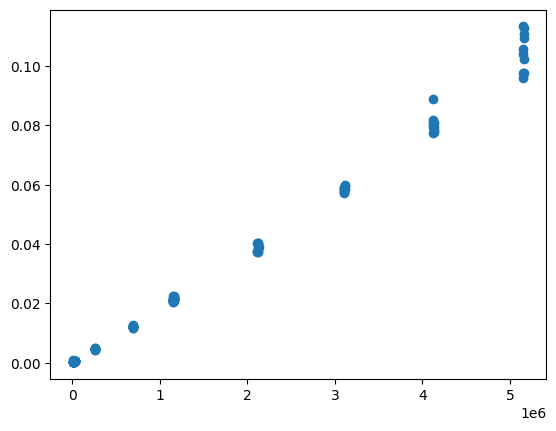

In [14]:
import matplotlib.pyplot as plt
x = [i for (i, j) in estadist]
y = [j for (i, j) in estadist]
plt.scatter(x, y)
plt.show()
